**CRUDE OIL**

> Team: Nirvana

> Team Members:
  1. Rithwik Kuchana(rithwik.kuchana@adypu.edu.in)
  2. Talari Ashwin Raj(talari.ashwinraj@adypu.edu.in)
  3. Srishty Shree(srishty.shree01@adypu.edu.in)
  4. Arkapravo Rajkonwar(arkapravo.rajkonwar@adypu.edu.in)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
import warnings
warnings.filterwarnings("ignore")


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
file_path = '/content/drive/MyDrive/CRUDE_OIL_DATASET.csv'
df = pd.read_csv(file_path)
df.head()

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 532 non-null    object 
 1   Year                                  532 non-null    int64  
 2   PRODUCTS                              532 non-null    object 
 3   TRADE                                 532 non-null    object 
 4   Quantity (000 Metric Tonnes)          489 non-null    float64
 5   Value in Rupees (Crore)               489 non-null    float64
 6   Value in Dollars (Million US dollar)  489 non-null    float64
 7   date_updated                          532 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 33.4+ KB


In [9]:
df.describe()

,Year,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar)
count,532.000000,489.000000,489.000000,489.000000
mean,2023.543233,3309.092147,15458.694826,1857.170941
std,0.498596,6701.983616,30716.954459,3688.391630
min,2023.000000,0.000000,0.020000,0.000000
25%,2023.000000,54.480000,308.250000,37.550000
50%,2024.000000,375.250000,1640.080000,196.370000
75%,2024.000000,1908.680000,9523.920000,1143.730000
max,2024.000000,26407.210000,129174.880000,15477.590000


In [13]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 Month                                    0
Year                                     0
PRODUCTS                                 0
TRADE                                    0
Quantity (000 Metric Tonnes)            43
Value in Rupees (Crore)                 43
Value in Dollars (Million US dollar)    43
date_updated                             0
dtype: int64

Duplicate Rows: 0


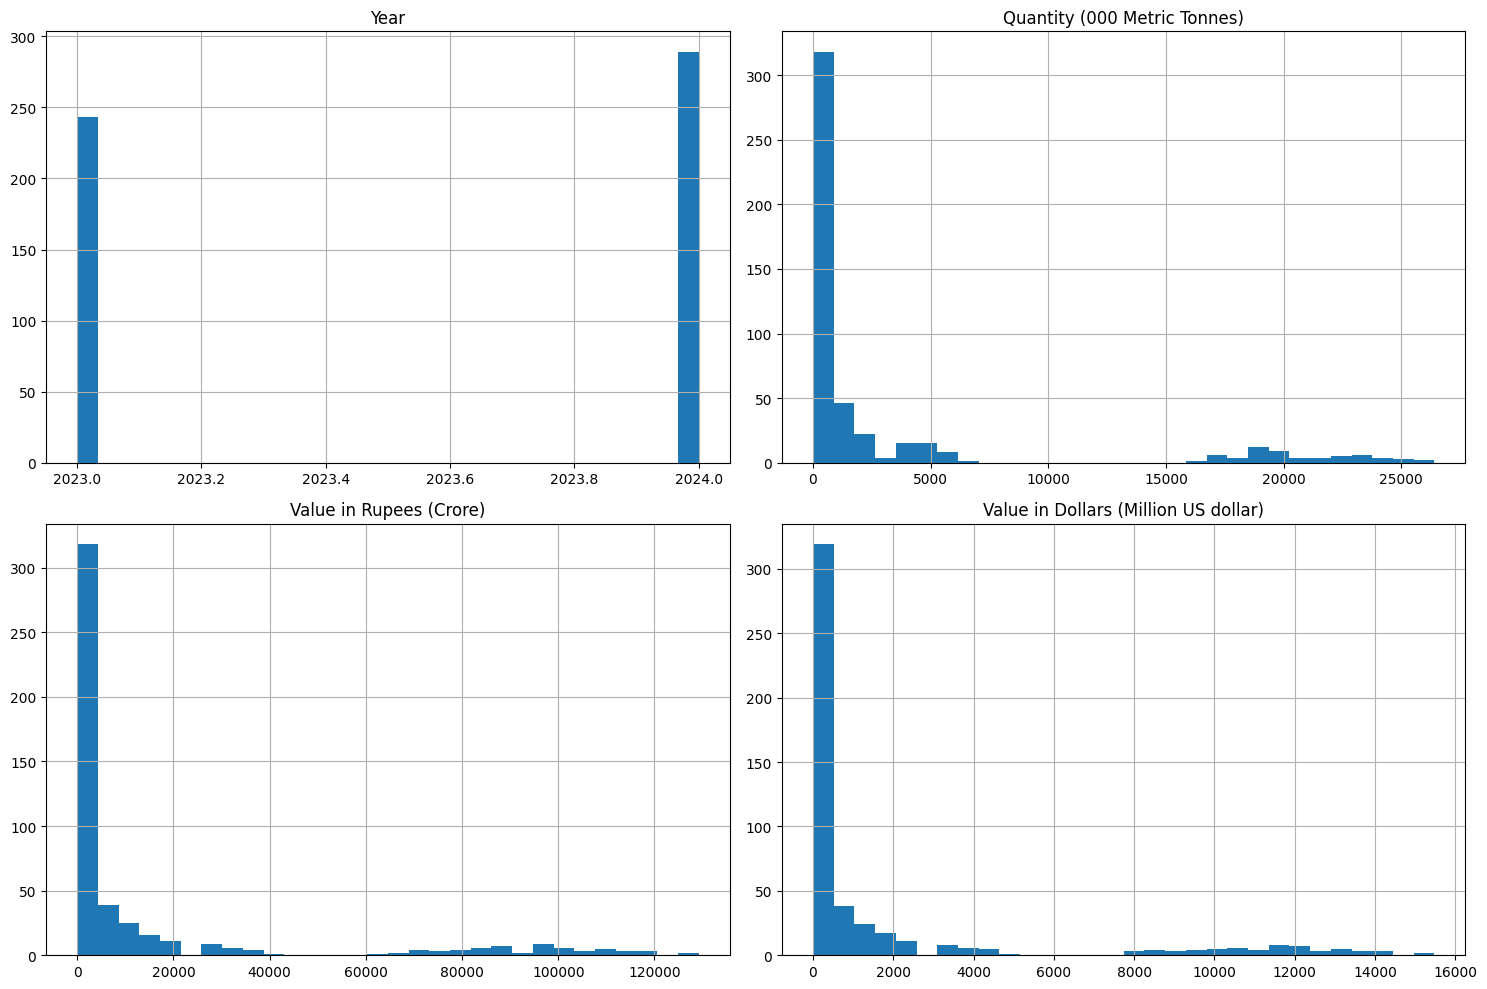

In [14]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

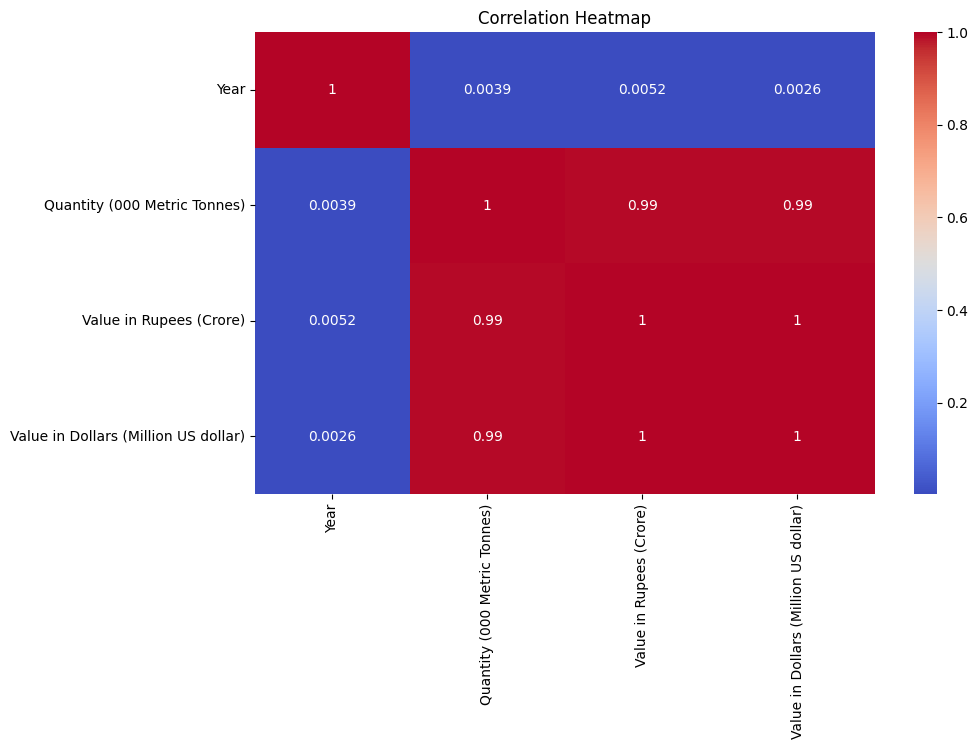

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
def benfords_law_check(series):
    first_digits = series.dropna().astype(str).str.strip().str[0].astype(int)
    actual_dist = first_digits.value_counts(normalize=True).sort_index()

    # Benford Expected Distribution
    benford_dist = [np.log10(1 + 1/d) for d in range(1, 10)]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, 10), benford_dist, label='Benford Expected', alpha=0.6)
    plt.bar(actual_dist.index, actual_dist.values, label='Actual Data', alpha=0.6)
    plt.xlabel('First Digit')
    plt.ylabel('Proportion')
    plt.title('Benford\'s Law Comparison')
    plt.legend()
    plt.show()

    # Chi-square test
    actual_freq = actual_dist.reindex(range(1, 10), fill_value=0).values
    expected_freq = np.array(benford_dist) * sum(actual_freq)
    chi2, p_value = chisquare(actual_freq, f_exp=expected_freq)
    print(f"Chi-square statistic: {chi2:.4f}, p-value: {p_value:.4f}")



Benford's Law check for column: Year


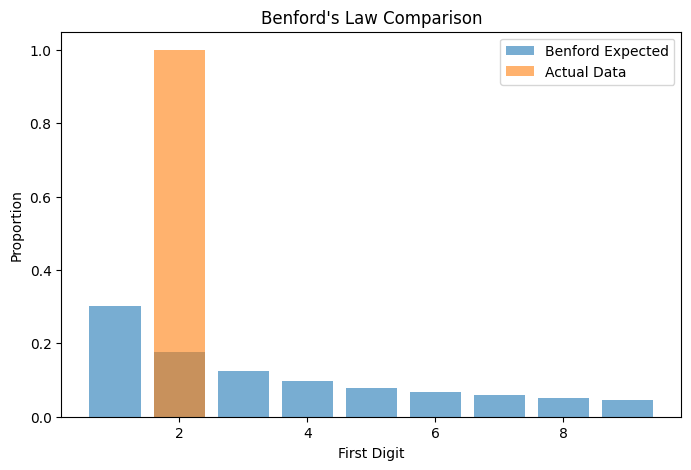

Chi-square statistic: 4.6789, p-value: 0.7913

Benford's Law check for column: Quantity (000 Metric Tonnes)


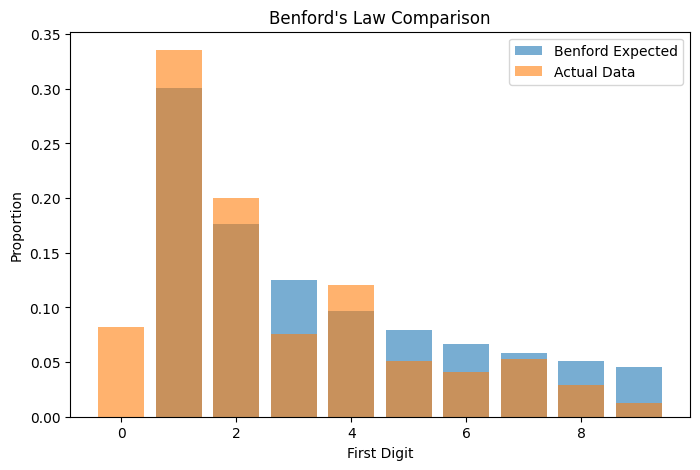

Chi-square statistic: 0.0879, p-value: 1.0000

Benford's Law check for column: Value in Rupees (Crore)


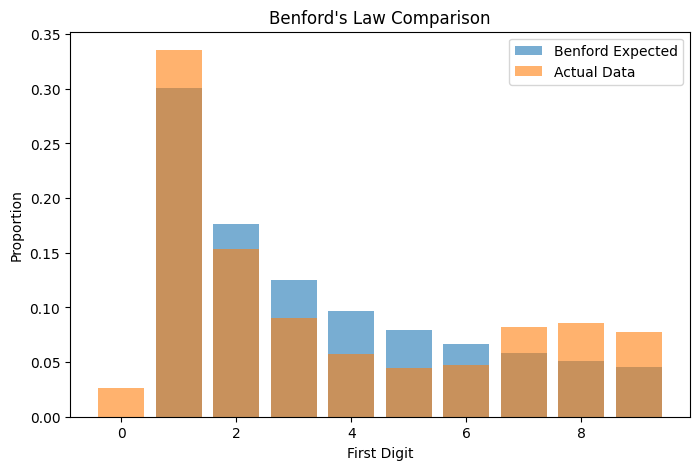

Chi-square statistic: 0.1115, p-value: 1.0000

Benford's Law check for column: Value in Dollars (Million US dollar)


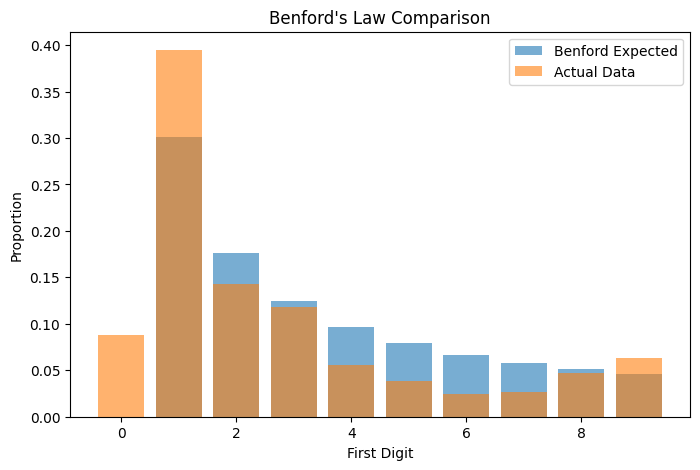

Chi-square statistic: 0.1287, p-value: 1.0000


In [18]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    print(f"\nBenford's Law check for column: {col}")
    benfords_law_check(df[col])

Contributons:

1. Rithwik Kuchana -> Coding part using the given data and managing GitHub
2. Talari Ashwin Raj-> Managing GitHub Repository, Refining the PPT
3. Srishty Shree -> Researching the data (what and where to use)
4. Arkapravo Rajkonwar -> Debugging the bugged data and creating presentations
